In [1]:
import pymn
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
import anndata as ad
import numpy as np
import itertools
import scipy.stats
import seaborn as sns

In [2]:
norm_data = sc.read_h5ad('/data/passala/Generated_Tables/Temp_junk/aggressive_filtering_corrected_norm_data_from_bruno.h5ad')

In [3]:
norm_data.obs

,Cell Cluster Annotation,Batch,Species,Cluster and Type,Cluster and Species,Type,Type and Species,n_genes,n_genes_by_counts,total_counts,leiden,_scvi_batch,_scvi_labels
Maize_Cell1_AAACCTGAGAGCTTCT,Cortex_4,Maize_Cell_1,Maize,Cortex_4 Cell,Cortex_4 Cell Maize,Cell,Maize Cell,3200,3200,7896.0,5,0,4
Maize_Cell1_AAACCTGAGTGATCGG,Stele_2,Maize_Cell_1,Maize,Stele_2 Cell,Stele_2 Cell Maize,Cell,Maize Cell,3572,3572,11547.0,9,0,14
Maize_Cell1_AAACCTGCACTGTCGG,Cortex_1,Maize_Cell_1,Maize,Cortex_1 Cell,Cortex_1 Cell Maize,Cell,Maize Cell,4682,4682,19710.0,5,0,1
Maize_Cell1_AAACCTGGTGTGAAAT,Cortex_4,Maize_Cell_1,Maize,Cortex_4 Cell,Cortex_4 Cell Maize,Cell,Maize Cell,4344,4344,17257.0,5,0,4
Maize_Cell1_AAACCTGTCTCAAGTG,Epidermis_2,Maize_Cell_1,Maize,Epidermis_2 Cell,Epidermis_2 Cell Maize,Cell,Maize Cell,3540,3540,11231.0,10,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Set_Cells_3_TTTGGTTTCTGGGTCG,Epidermis_2,Set_Cells_3,Setaria,Epidermis_2 Cell,Epidermis_2,Cell,Setaria Cell,1282,1282,3046.0,16,9,7
Set_Cells_3_TTTGTTGAGGCTCACC,Trichoblast,Set_Cells_3,Setaria,Trichoblast Cell,Trichoblast,Cell,Setaria Cell,1948,1948,8629.0,4,9,15
Set_Cells_3_TTTGTTGCAACCAGAG,Phloem,Set_Cells_3,Setaria,Phloem Cell,Phloem,Cell,Setaria Cell,2160,2160,7360.0,34,9,12
Set_Cells_3_TTTGTTGCAGTCTACA,LRC,Set_Cells_3,Setaria,LRC Cell,LRC,Cell,Setaria Cell,1138,1138,2892.0,4,9,10


In [4]:
maize_scores = pd.read_csv('/data/passala/Collaborator_Data/Bruno_Ken_Collab/Post_review_Dataset/maize_based_ici_scores.csv',index_col = 0)
sorghum_scores = pd.read_csv('/data/passala/Collaborator_Data/Bruno_Ken_Collab/Post_review_Dataset/sorghum_based_ici_scores.csv',index_col = 0)
setaria_scores = pd.read_csv('/data/passala/Collaborator_Data/Bruno_Ken_Collab/Post_review_Dataset/setaria_based_ici_scores.csv',index_col = 0)

In [5]:
maize_scores = maize_scores.drop(columns = 'Maize_Cortex_2')
setaria_scores = setaria_scores.drop(columns= 'Setaria_Young_Stele_2')
sorghum_scores = sorghum_scores.drop(columns = ['Sorghum_Cortex_2','Sorghum_Young_Stele_2'])

In [6]:
sorghum_scores.T

,Maize_Cell1_AAACCTGAGAGCTTCT,Maize_Cell1_AAACCTGAGTGATCGG,Maize_Cell1_AAACCTGCACTGTCGG,Maize_Cell1_AAACCTGGTGTGAAAT,Maize_Cell1_AAACCTGTCTCAAGTG,Maize_Cell1_AAACGGGAGGAGTTTA,Maize_Cell1_AAACGGGGTAAAGGAG,Maize_Cell1_AAACGGGTCAAGATCC,Maize_Cell1_AAAGATGAGAGGTTGC,Maize_Cell1_AAAGATGCAGAGCCAA,...,Set_Cells_3_TTTGGAGGTTCGGCTG,Set_Cells_3_TTTGGAGTCTGTAACG,Set_Cells_3_TTTGGTTAGCCGATCC,Set_Cells_3_TTTGGTTAGTCACTGT,Set_Cells_3_TTTGGTTGTTACCCAA,Set_Cells_3_TTTGGTTTCTGGGTCG,Set_Cells_3_TTTGTTGAGGCTCACC,Set_Cells_3_TTTGTTGCAACCAGAG,Set_Cells_3_TTTGTTGCAGTCTACA,Set_Cells_3_TTTGTTGGTGGTCTCG
Sorghum_Columella,0.002681,0.001048,0.001788,0.000597,0.002928,0.006096,0.002125,0.000430,0.004122,0.000746,...,0.009206,0.025589,0.343799,0.087291,0.009892,0.011750,0.022282,0.000099,0.007432,0.080029
Sorghum_Cortex_1,0.005000,0.051655,0.079698,0.025272,0.000220,0.026728,0.000463,0.003449,0.008155,0.000238,...,0.202281,0.002955,0.001694,0.001757,0.001157,0.000000,0.002310,0.000602,0.010679,0.145761
Sorghum_Cortex_3,0.002929,0.024478,0.018465,0.002555,0.001074,0.016961,0.000647,0.000505,0.004850,0.001360,...,0.285593,0.008513,0.032374,0.042372,0.008058,0.002401,0.010839,0.002349,0.013943,0.509143
Sorghum_Cortex_4,0.030359,0.111284,0.061779,0.042282,0.001204,0.032264,0.000549,0.006815,0.011098,0.008490,...,0.342253,0.035517,0.001243,0.072173,0.006808,0.000000,0.056324,0.000306,0.088653,0.199570
Sorghum_Endodermis,0.010070,0.082283,0.014954,0.008102,0.001283,0.129570,0.002151,0.004499,0.018783,0.007346,...,0.077384,0.000000,0.000168,0.001150,0.018791,0.000000,0.000391,0.002742,0.001072,0.000573
Sorghum_Epidermis_1,0.000000,0.000000,0.000000,0.000000,0.138014,0.000000,0.007243,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.060767,0.000000,0.000000,0.031542,0.006222,0.000000,0.000000,0.000000
Sorghum_Epidermis_2,0.013056,0.000000,0.023022,0.014753,0.158739,0.002863,0.000955,0.000000,0.002358,0.000000,...,0.000000,0.026866,0.326394,0.012387,0.000663,0.678961,0.102882,0.000394,0.000333,0.001886
Sorghum_Epidermis_3,0.062405,0.039311,0.224894,0.210772,0.212208,0.025392,0.023300,0.025507,0.032292,0.001297,...,0.000396,0.033291,0.078177,0.006856,0.000000,0.191441,0.103409,0.000000,0.000390,0.003097
Sorghum_G2_M,0.000000,0.002509,0.000702,0.002730,0.000266,0.000000,0.003655,0.122831,0.005025,0.000173,...,0.000635,0.000000,0.001734,0.000000,0.015172,0.004189,0.000060,0.000000,0.000000,0.001176
Sorghum_LRC,0.000786,0.019330,0.004216,0.009123,0.009632,0.010568,0.000239,0.000000,0.002557,0.000000,...,0.016173,0.705221,0.017229,0.744796,0.004665,0.008720,0.385443,0.000101,0.837982,0.023641


In [7]:
maize_scores.T

,Maize_Cell1_AAACCTGAGAGCTTCT,Maize_Cell1_AAACCTGAGTGATCGG,Maize_Cell1_AAACCTGCACTGTCGG,Maize_Cell1_AAACCTGGTGTGAAAT,Maize_Cell1_AAACCTGTCTCAAGTG,Maize_Cell1_AAACGGGAGGAGTTTA,Maize_Cell1_AAACGGGGTAAAGGAG,Maize_Cell1_AAACGGGTCAAGATCC,Maize_Cell1_AAAGATGAGAGGTTGC,Maize_Cell1_AAAGATGCAGAGCCAA,...,Set_Cells_3_TTTGGAGGTTCGGCTG,Set_Cells_3_TTTGGAGTCTGTAACG,Set_Cells_3_TTTGGTTAGCCGATCC,Set_Cells_3_TTTGGTTAGTCACTGT,Set_Cells_3_TTTGGTTGTTACCCAA,Set_Cells_3_TTTGGTTTCTGGGTCG,Set_Cells_3_TTTGTTGAGGCTCACC,Set_Cells_3_TTTGTTGCAACCAGAG,Set_Cells_3_TTTGTTGCAGTCTACA,Set_Cells_3_TTTGTTGGTGGTCTCG
Maize_Columella,0.000000,0.000000,0.000000,0.000517,0.000951,0.003042,0.000000,0.000000,0.077794,0.009764,...,0.015202,0.003071,0.068986,0.059411,0.008554,0.000211,0.003778,0.001302,0.027765,0.050006
Maize_Cortex_1,0.525513,0.000000,0.818272,0.033956,0.000000,0.015561,0.000000,0.000000,0.065429,0.000000,...,0.130527,0.004335,0.015911,0.047362,0.001717,0.002028,0.026530,0.017961,0.060470,0.082156
Maize_Cortex_3,0.003010,0.000000,0.000692,0.001033,0.000361,0.017337,0.000788,0.000000,0.000000,0.000000,...,0.124192,0.027305,0.064267,0.075393,0.002470,0.007549,0.013585,0.008858,0.075056,0.213578
Maize_Cortex_4,0.238969,0.000000,0.166850,0.610549,0.000000,0.142403,0.000000,0.000000,0.072746,0.000000,...,0.271238,0.016602,0.000000,0.205185,0.004701,0.025557,0.044321,0.005471,0.175542,0.136012
Maize_Endodermis,0.000000,0.493449,0.000000,0.021731,0.000000,0.313852,0.000000,0.000000,0.000000,0.082859,...,0.285852,0.008884,0.011605,0.017421,0.007233,0.004212,0.001399,0.026195,0.031895,0.208822
Maize_Epidermis_1,0.000000,0.000000,0.000000,0.000000,0.002592,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001172,0.002125,0.016005,0.000000,0.018408,0.013302,0.000482,0.001026,0.002048,0.000000
Maize_Epidermis_2,0.042094,0.000000,0.000456,0.015913,0.417549,0.018203,0.012377,0.000000,0.014155,0.000000,...,0.001162,0.173179,0.201517,0.058455,0.000000,0.351965,0.159702,0.000000,0.037645,0.011434
Maize_Epidermis_3,0.032641,0.052362,0.001430,0.109230,0.429155,0.015221,0.045060,0.000000,0.024663,0.000000,...,0.018502,0.274667,0.243922,0.114871,0.000000,0.316811,0.306672,0.000150,0.121323,0.031765
Maize_G2_M,0.000000,0.011632,0.000365,0.000566,0.000458,0.000000,0.000000,0.829752,0.015491,0.005730,...,0.000148,0.000634,0.009365,0.000000,0.011448,0.001173,0.001185,0.000000,0.001403,0.001157
Maize_LRC,0.016927,0.010302,0.000450,0.028828,0.016228,0.017259,0.000000,0.000000,0.001651,0.000000,...,0.086211,0.230582,0.144465,0.265271,0.000763,0.049354,0.182505,0.000824,0.239708,0.118497


In [8]:
setaria_scores.T

,Maize_Cell1_AAACCTGAGAGCTTCT,Maize_Cell1_AAACCTGAGTGATCGG,Maize_Cell1_AAACCTGCACTGTCGG,Maize_Cell1_AAACCTGGTGTGAAAT,Maize_Cell1_AAACCTGTCTCAAGTG,Maize_Cell1_AAACGGGAGGAGTTTA,Maize_Cell1_AAACGGGGTAAAGGAG,Maize_Cell1_AAACGGGTCAAGATCC,Maize_Cell1_AAAGATGAGAGGTTGC,Maize_Cell1_AAAGATGCAGAGCCAA,...,Set_Cells_3_TTTGGAGGTTCGGCTG,Set_Cells_3_TTTGGAGTCTGTAACG,Set_Cells_3_TTTGGTTAGCCGATCC,Set_Cells_3_TTTGGTTAGTCACTGT,Set_Cells_3_TTTGGTTGTTACCCAA,Set_Cells_3_TTTGGTTTCTGGGTCG,Set_Cells_3_TTTGTTGAGGCTCACC,Set_Cells_3_TTTGTTGCAACCAGAG,Set_Cells_3_TTTGTTGCAGTCTACA,Set_Cells_3_TTTGTTGGTGGTCTCG
Setaria_Columella,0.028119,0.031796,0.048267,0.007172,0.001906,0.043555,0.045606,0.040785,0.038286,0.015573,...,0.006564,0.009980,0.218859,0.020563,0.007434,0.002936,0.019673,0.000731,0.023625,0.036261
Setaria_Cortex_1,0.014606,0.010592,0.121817,0.015440,0.002107,0.105381,0.001664,0.000000,0.029420,0.012352,...,0.346376,0.007061,0.000000,0.001627,0.000000,0.000000,0.001777,0.001984,0.022442,0.037908
Setaria_Cortex_3,0.032387,0.037114,0.208008,0.046700,0.003403,0.068858,0.023810,0.024075,0.072648,0.028955,...,0.286377,0.004655,0.029413,0.039816,0.002827,0.001256,0.003041,0.001166,0.008030,0.263420
Setaria_Cortex_4,0.068848,0.002452,0.084676,0.190114,0.017920,0.010510,0.000000,0.006433,0.043965,0.006989,...,0.072245,0.023556,0.000000,0.014906,0.000000,0.000000,0.014329,0.000533,0.061113,0.019076
Setaria_Endodermis,0.032339,0.074908,0.085766,0.098220,0.005425,0.123769,0.029675,0.020769,0.075102,0.024932,...,0.147952,0.000000,0.000000,0.001214,0.016640,0.000000,0.000850,0.006449,0.000000,0.001212
Setaria_Epidermis_1,0.000000,0.000000,0.000000,0.175852,0.641747,0.000000,0.173179,0.000000,0.000000,0.000000,...,0.000000,0.113093,0.264311,0.000000,0.000000,0.293940,0.025847,0.000000,0.000000,0.000000
Setaria_Epidermis_2,0.001665,0.001628,0.004407,0.023488,0.080637,0.007083,0.001178,0.000000,0.001115,0.001457,...,0.000117,0.011023,0.247543,0.007442,0.000631,0.323663,0.091125,0.000229,0.005232,0.000264
Setaria_Epidermis_3,0.034150,0.000000,0.000000,0.010733,0.156031,0.002183,0.028144,0.000000,0.003171,0.002825,...,0.000000,0.037001,0.194030,0.011473,0.008739,0.293845,0.181436,0.000392,0.009266,0.000000
Setaria_G2_M,0.000000,0.000912,0.003507,0.008847,0.000000,0.000000,0.021761,0.559779,0.029577,0.002200,...,0.000581,0.000000,0.001526,0.000000,0.003955,0.002942,0.000118,0.000240,0.000000,0.001059
Setaria_LRC,0.003043,0.007072,0.008138,0.044449,0.007020,0.019149,0.002198,0.000000,0.032396,0.000000,...,0.007696,0.386023,0.014121,0.847607,0.000640,0.002843,0.140445,0.000000,0.720130,0.003576


In [9]:
full_results = pd.concat([maize_scores,sorghum_scores,setaria_scores], axis = 1)
full_results

,Maize_Columella,Maize_Cortex_1,Maize_Cortex_3,Maize_Cortex_4,Maize_Endodermis,Maize_Epidermis_1,Maize_Epidermis_2,Maize_Epidermis_3,Maize_G2_M,Maize_LRC,...,Setaria_Epidermis_3,Setaria_G2_M,Setaria_LRC,Setaria_Pericycle,Setaria_Phloem,Setaria_Stele_1,Setaria_Stele_2,Setaria_Trichoblast,Setaria_Xylem,Setaria_Young_Phloem
Maize_Cell1_AAACCTGAGAGCTTCT,0.000000,0.525513,0.003010,0.238969,0.000000,0.000000,0.042094,0.032641,0.000000,0.016927,...,0.034150,0.000000,0.003043,0.038318,0.040570,0.000000,0.015967,0.000000,0.029643,0.001685
Maize_Cell1_AAACCTGAGTGATCGG,0.000000,0.000000,0.000000,0.000000,0.493449,0.000000,0.000000,0.052362,0.011632,0.010302,...,0.000000,0.000912,0.007072,0.141137,0.078227,0.406931,0.020329,0.000000,0.010514,0.176388
Maize_Cell1_AAACCTGCACTGTCGG,0.000000,0.818272,0.000692,0.166850,0.000000,0.000000,0.000456,0.001430,0.000365,0.000450,...,0.000000,0.003507,0.008138,0.153544,0.176176,0.000000,0.005810,0.000000,0.039492,0.060391
Maize_Cell1_AAACCTGGTGTGAAAT,0.000517,0.033956,0.001033,0.610549,0.021731,0.000000,0.015913,0.109230,0.000566,0.028828,...,0.010733,0.008847,0.044449,0.081509,0.044436,0.000000,0.018393,0.046384,0.054622,0.039846
Maize_Cell1_AAACCTGTCTCAAGTG,0.000951,0.000000,0.000361,0.000000,0.000000,0.002592,0.417549,0.429155,0.000458,0.016228,...,0.156031,0.000000,0.007020,0.004603,0.001799,0.000000,0.000275,0.019223,0.000030,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Set_Cells_3_TTTGGTTTCTGGGTCG,0.000211,0.002028,0.007549,0.025557,0.004212,0.013302,0.351965,0.316811,0.001173,0.049354,...,0.293845,0.002942,0.002843,0.000061,0.001742,0.000000,0.000000,0.075833,0.000279,0.000659
Set_Cells_3_TTTGTTGAGGCTCACC,0.003778,0.026530,0.013585,0.044321,0.001399,0.000482,0.159702,0.306672,0.001185,0.182505,...,0.181436,0.000118,0.140445,0.001837,0.000122,0.000000,0.000035,0.519364,0.000000,0.000000
Set_Cells_3_TTTGTTGCAACCAGAG,0.001302,0.017961,0.008858,0.005471,0.026195,0.001026,0.000000,0.000150,0.000000,0.000824,...,0.000392,0.000240,0.000000,0.006404,0.543996,0.000000,0.118094,0.000000,0.012559,0.307223
Set_Cells_3_TTTGTTGCAGTCTACA,0.027765,0.060470,0.075056,0.175542,0.031895,0.002048,0.037645,0.121323,0.001403,0.239708,...,0.009266,0.000000,0.720130,0.001435,0.000760,0.000000,0.000278,0.145338,0.002348,0.000000


In [10]:
norm_data.obs

,Cell Cluster Annotation,Batch,Species,Cluster and Type,Cluster and Species,Type,Type and Species,n_genes,n_genes_by_counts,total_counts,leiden,_scvi_batch,_scvi_labels
Maize_Cell1_AAACCTGAGAGCTTCT,Cortex_4,Maize_Cell_1,Maize,Cortex_4 Cell,Cortex_4 Cell Maize,Cell,Maize Cell,3200,3200,7896.0,5,0,4
Maize_Cell1_AAACCTGAGTGATCGG,Stele_2,Maize_Cell_1,Maize,Stele_2 Cell,Stele_2 Cell Maize,Cell,Maize Cell,3572,3572,11547.0,9,0,14
Maize_Cell1_AAACCTGCACTGTCGG,Cortex_1,Maize_Cell_1,Maize,Cortex_1 Cell,Cortex_1 Cell Maize,Cell,Maize Cell,4682,4682,19710.0,5,0,1
Maize_Cell1_AAACCTGGTGTGAAAT,Cortex_4,Maize_Cell_1,Maize,Cortex_4 Cell,Cortex_4 Cell Maize,Cell,Maize Cell,4344,4344,17257.0,5,0,4
Maize_Cell1_AAACCTGTCTCAAGTG,Epidermis_2,Maize_Cell_1,Maize,Epidermis_2 Cell,Epidermis_2 Cell Maize,Cell,Maize Cell,3540,3540,11231.0,10,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Set_Cells_3_TTTGGTTTCTGGGTCG,Epidermis_2,Set_Cells_3,Setaria,Epidermis_2 Cell,Epidermis_2,Cell,Setaria Cell,1282,1282,3046.0,16,9,7
Set_Cells_3_TTTGTTGAGGCTCACC,Trichoblast,Set_Cells_3,Setaria,Trichoblast Cell,Trichoblast,Cell,Setaria Cell,1948,1948,8629.0,4,9,15
Set_Cells_3_TTTGTTGCAACCAGAG,Phloem,Set_Cells_3,Setaria,Phloem Cell,Phloem,Cell,Setaria Cell,2160,2160,7360.0,34,9,12
Set_Cells_3_TTTGTTGCAGTCTACA,LRC,Set_Cells_3,Setaria,LRC Cell,LRC,Cell,Setaria Cell,1138,1138,2892.0,4,9,10


In [11]:
merged_obs_and_full_results = norm_data.obs.merge(right = full_results, left_index= True,right_index= True)

In [12]:
maize_data_only = merged_obs_and_full_results.loc[merged_obs_and_full_results['Species'] == 'Maize']
sorghum_data_only = merged_obs_and_full_results.loc[merged_obs_and_full_results['Species'] == 'Sorghum']
setaria_data_only = merged_obs_and_full_results.loc[merged_obs_and_full_results['Species'] == 'Setaria']

maize_data_only

,Cell Cluster Annotation,Batch,Species,Cluster and Type,Cluster and Species,Type,Type and Species,n_genes,n_genes_by_counts,total_counts,...,Setaria_Epidermis_3,Setaria_G2_M,Setaria_LRC,Setaria_Pericycle,Setaria_Phloem,Setaria_Stele_1,Setaria_Stele_2,Setaria_Trichoblast,Setaria_Xylem,Setaria_Young_Phloem
Maize_Cell1_AAACCTGAGAGCTTCT,Cortex_4,Maize_Cell_1,Maize,Cortex_4 Cell,Cortex_4 Cell Maize,Cell,Maize Cell,3200,3200,7896.0,...,0.034150,0.000000,0.003043,0.038318,0.040570,0.000000,0.015967,0.000000,0.029643,0.001685
Maize_Cell1_AAACCTGAGTGATCGG,Stele_2,Maize_Cell_1,Maize,Stele_2 Cell,Stele_2 Cell Maize,Cell,Maize Cell,3572,3572,11547.0,...,0.000000,0.000912,0.007072,0.141137,0.078227,0.406931,0.020329,0.000000,0.010514,0.176388
Maize_Cell1_AAACCTGCACTGTCGG,Cortex_1,Maize_Cell_1,Maize,Cortex_1 Cell,Cortex_1 Cell Maize,Cell,Maize Cell,4682,4682,19710.0,...,0.000000,0.003507,0.008138,0.153544,0.176176,0.000000,0.005810,0.000000,0.039492,0.060391
Maize_Cell1_AAACCTGGTGTGAAAT,Cortex_4,Maize_Cell_1,Maize,Cortex_4 Cell,Cortex_4 Cell Maize,Cell,Maize Cell,4344,4344,17257.0,...,0.010733,0.008847,0.044449,0.081509,0.044436,0.000000,0.018393,0.046384,0.054622,0.039846
Maize_Cell1_AAACCTGTCTCAAGTG,Epidermis_2,Maize_Cell_1,Maize,Epidermis_2 Cell,Epidermis_2 Cell Maize,Cell,Maize Cell,3540,3540,11231.0,...,0.156031,0.000000,0.007020,0.004603,0.001799,0.000000,0.000275,0.019223,0.000030,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Maize_Nucl4_TGTTCCGCACTGGACC,Cortex_2,Maize_Nucl4,Maize,Cortex_2 Nucl,Cortex_2 Nucl Maize,Nucl,Maize Nucl,3546,3546,5567.0,...,0.021878,0.614457,0.000900,0.002834,0.021805,0.000000,0.033188,0.000000,0.034373,0.023822
Maize_Nucl4_TTCATTGCAATTCTTC,Pericycle,Maize_Nucl4,Maize,Pericycle Nucl,Pericycle Nucl Maize,Nucl,Maize Nucl,2217,2217,2932.0,...,0.013746,0.648407,0.006572,0.006176,0.020849,0.000000,0.050269,0.016575,0.006466,0.009685
Maize_Nucl4_TTCTAACAGGGAGAAT,Cortex_2,Maize_Nucl4,Maize,Cortex_2 Nucl,Cortex_2 Nucl Maize,Nucl,Maize Nucl,1608,1608,2133.0,...,0.012507,0.421996,0.012963,0.000161,0.004072,0.000000,0.018974,0.000000,0.019271,0.006258
Maize_Nucl4_TTGCTGCAGCTGTGCC,Columella,Maize_Nucl4,Maize,Columella Nucl,Columella Nucl Maize,Nucl,Maize Nucl,1917,1917,2468.0,...,0.185800,0.029165,0.005613,0.011194,0.006281,0.000000,0.157006,0.099787,0.067590,0.000000


In [13]:
sorghum_data_only

,Cell Cluster Annotation,Batch,Species,Cluster and Type,Cluster and Species,Type,Type and Species,n_genes,n_genes_by_counts,total_counts,...,Setaria_Epidermis_3,Setaria_G2_M,Setaria_LRC,Setaria_Pericycle,Setaria_Phloem,Setaria_Stele_1,Setaria_Stele_2,Setaria_Trichoblast,Setaria_Xylem,Setaria_Young_Phloem
Sorghum_Cell_AAACCCAGTCATAGTC,Stele_1,Sorgh_Cells,Sorghum,Stele_1 Cell,Stele_1 Cell Sorghum,Cell,Sorghum Cell,2872,2872,13543.0,...,0.003092,0.001231,0.012258,0.463487,0.140798,0.000000,0.028609,0.000431,0.034762,0.075693
Sorghum_Cell_AAAGAACTCATCGACA,Young_Stele_2,Sorgh_Cells,Sorghum,Young_Stele_2 Cell,Young_Stele_2 Cell Sorghum,Cell,Sorghum Cell,1805,1805,5372.0,...,0.000000,0.008279,0.000000,0.375416,0.083240,0.000000,0.039297,0.000000,0.045530,0.079449
Sorghum_Cell_AAAGGTAAGAGAAGGT,Stele_1,Sorgh_Cells,Sorghum,Stele_1 Cell,Stele_1 Cell Sorghum,Cell,Sorghum Cell,1112,1112,2679.0,...,0.000000,0.000000,0.003085,0.287260,0.097405,0.000000,0.058611,0.000000,0.035992,0.080777
Sorghum_Cell_AAAGGTAGTGAACGGT,Stele_1,Sorgh_Cells,Sorghum,Stele_1 Cell,Stele_1 Cell Sorghum,Cell,Sorghum Cell,2876,2876,16059.0,...,0.002877,0.002166,0.013808,0.376557,0.137503,0.055637,0.033311,0.008465,0.056571,0.068290
Sorghum_Cell_AAAGTGATCCCAAGTA,Stele_1,Sorgh_Cells,Sorghum,Stele_1 Cell,Stele_1 Cell Sorghum,Cell,Sorghum Cell,3111,3111,16063.0,...,0.002997,0.001833,0.006006,0.398929,0.124448,0.060614,0.035358,0.000000,0.035897,0.112007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sorghum_Nucl2_CATTTCACAAACACGG,Young_Stele_2,Sorgh_Nucl2,Sorghum,Young_Stele_2 Nucl,Young_Stele_2 Nucl Sorghum,Nucl,Sorghum Nucl,1176,1176,1967.0,...,0.077216,0.144793,0.000000,0.003086,0.003986,0.000000,0.003674,0.009764,0.005656,0.018463
Sorghum_Nucl2_GAAGGGTGTTCTGAGT,Epidermis_1,Sorgh_Nucl2,Sorghum,Epidermis_1 Nucl,Epidermis_1 Nucl Sorghum,Nucl,Sorghum Nucl,999,999,1482.0,...,0.020129,0.668700,0.000000,0.000049,0.000644,0.000000,0.003262,0.068921,0.001767,0.063316
Sorghum_Nucl2_GCACGGTGTTCTCCAC,Cortex_2,Sorgh_Nucl2,Sorghum,Cortex_2 Nucl,Cortex_2 Nucl Sorghum,Nucl,Sorghum Nucl,1110,1110,1817.0,...,0.029859,0.101483,0.005498,0.001945,0.011500,0.505707,0.021291,0.043081,0.018363,0.038109
Sorghum_Nucl2_TCACACCTCTGCACCT,Epidermis_2,Sorgh_Nucl2,Sorghum,Epidermis_2 Nucl,Epidermis_2 Nucl Sorghum,Nucl,Sorghum Nucl,1461,1461,2471.0,...,0.047790,0.043537,0.000136,0.000795,0.000417,0.717825,0.000160,0.008632,0.000256,0.000420


In [14]:
setaria_data_only

,Cell Cluster Annotation,Batch,Species,Cluster and Type,Cluster and Species,Type,Type and Species,n_genes,n_genes_by_counts,total_counts,...,Setaria_Epidermis_3,Setaria_G2_M,Setaria_LRC,Setaria_Pericycle,Setaria_Phloem,Setaria_Stele_1,Setaria_Stele_2,Setaria_Trichoblast,Setaria_Xylem,Setaria_Young_Phloem
Set_Cell_AAACGGGAGAGTACAT-1,Pericycle,Set_Cells,Setaria,Pericycle Cell,Pericycle,Cell,Setaria Cell,984,984,2393.0,...,0.000000,0.000000,0.003208,0.616404,0.068449,0.000000,0.049016,0.000000,0.020694,0.039756
Set_Cell_AAACGGGGTATATGGA-1,Young_Phloem,Set_Cells,Setaria,Young_Phloem Cell,Young_Phloem,Cell,Setaria Cell,1008,1008,2314.0,...,0.000000,0.001072,0.010418,0.264662,0.100452,0.000000,0.035910,0.000000,0.016517,0.264418
Set_Cell_AAATGCCAGAGCTGGT-1,Stele_1,Set_Cells,Setaria,Stele_1 Cell,Stele_1,Cell,Setaria Cell,1316,1316,3234.0,...,0.001125,0.000244,0.018849,0.313018,0.141136,0.000000,0.032860,0.004979,0.029455,0.154516
Set_Cell_AAATGCCAGTTTCCTT-1,Endodermis,Set_Cells,Setaria,Endodermis Cell,Endodermis,Cell,Setaria Cell,986,986,2342.0,...,0.000000,0.000216,0.000168,0.123825,0.020370,0.000000,0.009238,0.000000,0.010565,0.004798
Set_Cell_AAATGCCGTACTTAGC-1,Cortex_1,Set_Cells,Setaria,Cortex_1 Cell,Cortex_1,Cell,Setaria Cell,951,951,2534.0,...,0.000000,0.000545,0.002935,0.368350,0.041542,0.000000,0.012663,0.000000,0.001504,0.001656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Set_Cells_3_TTTGGTTTCTGGGTCG,Epidermis_2,Set_Cells_3,Setaria,Epidermis_2 Cell,Epidermis_2,Cell,Setaria Cell,1282,1282,3046.0,...,0.293845,0.002942,0.002843,0.000061,0.001742,0.000000,0.000000,0.075833,0.000279,0.000659
Set_Cells_3_TTTGTTGAGGCTCACC,Trichoblast,Set_Cells_3,Setaria,Trichoblast Cell,Trichoblast,Cell,Setaria Cell,1948,1948,8629.0,...,0.181436,0.000118,0.140445,0.001837,0.000122,0.000000,0.000035,0.519364,0.000000,0.000000
Set_Cells_3_TTTGTTGCAACCAGAG,Phloem,Set_Cells_3,Setaria,Phloem Cell,Phloem,Cell,Setaria Cell,2160,2160,7360.0,...,0.000392,0.000240,0.000000,0.006404,0.543996,0.000000,0.118094,0.000000,0.012559,0.307223
Set_Cells_3_TTTGTTGCAGTCTACA,LRC,Set_Cells_3,Setaria,LRC Cell,LRC,Cell,Setaria Cell,1138,1138,2892.0,...,0.009266,0.000000,0.720130,0.001435,0.000760,0.000000,0.000278,0.145338,0.002348,0.000000


In [15]:
len(norm_data.obs['Cell Cluster Annotation'].unique())

19

In [16]:
list_of_cell_types = ['Cortex_4', 'Stele_2', 'Cortex_1', 'Epidermis_2',
       'Stele_1', 'Epidermis_1', 'Cortex_3', 'Pericycle', 'Epidermis_3',
       'LRC', 'Trichoblast', 'Phloem', 'Xylem',
       'Young_Phloem', 'G2_M', 'Endodermis', 'Columella']

In [17]:
all_cell_correct_results = pd.DataFrame(columns = ['ICI Score','Label Species','True Cell Type'])
for cell_type in list_of_cell_types:
    labeled_cells = maize_data_only.loc[maize_data_only['Cell Cluster Annotation'] == cell_type]


    current_cell_label = 'Setaria_'+cell_type
    labeled_cells_scores_1 = labeled_cells[[current_cell_label]]
    labeled_cells_scores_1['Label Species'] = 'Setaria'
    labeled_cells_scores_1['True Cell Type'] = cell_type
    labeled_cells_scores_1 = labeled_cells_scores_1.rename(columns = {current_cell_label:'ICI Score'})

    current_cell_label = 'Sorghum_'+cell_type
    labeled_cells_scores_2 = labeled_cells[[current_cell_label]]
    labeled_cells_scores_2['Label Species'] = 'Sorghum'
    labeled_cells_scores_2['True Cell Type'] = cell_type

    labeled_cells_scores_2 = labeled_cells_scores_2.rename(columns = {current_cell_label:'ICI Score'})
    
    all_cell_correct_results = pd.concat([all_cell_correct_results,labeled_cells_scores_1,labeled_cells_scores_2])

all_cell_correct_results

/tmp/ipykernel_3646709/494399012.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labeled_cells_scores_1['Label Species'] = 'Setaria'
/tmp/ipykernel_3646709/494399012.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labeled_cells_scores_1['True Cell Type'] = cell_type
/tmp/ipykernel_3646709/494399012.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

,ICI Score,Label Species,True Cell Type
Maize_Cell1_AAACCTGAGAGCTTCT,0.068848,Setaria,Cortex_4
Maize_Cell1_AAACCTGGTGTGAAAT,0.190114,Setaria,Cortex_4
Maize_Cell1_AAAGTAGCACGAAATA,0.034522,Setaria,Cortex_4
Maize_Cell1_AAAGTAGGTTACGCGC,0.086418,Setaria,Cortex_4
Maize_Cell1_AACGTTGAGGCATTGG,0.064628,Setaria,Cortex_4
...,...,...,...
Maize_Nucl4_TCGACGGTCAGACCCG,0.001779,Sorghum,Columella
Maize_Nucl4_TGCTCCAGTAGAGGAA,0.10465,Sorghum,Columella
Maize_Nucl4_TGCTCCATCACCTTGC,0.009837,Sorghum,Columella
Maize_Nucl4_TGTAGACGTTCGTACA,0.044177,Sorghum,Columella


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Cortex_4'),
  Text(1, 0, 'Stele_2'),
  Text(2, 0, 'Cortex_1'),
  Text(3, 0, 'Epidermis_2'),
  Text(4, 0, 'Stele_1'),
  Text(5, 0, 'Epidermis_1'),
  Text(6, 0, 'Cortex_3'),
  Text(7, 0, 'Pericycle'),
  Text(8, 0, 'Epidermis_3'),
  Text(9, 0, 'LRC'),
  Text(10, 0, 'Trichoblast'),
  Text(11, 0, 'Phloem'),
  Text(12, 0, 'Xylem'),
  Text(13, 0, 'Young_Phloem'),
  Text(14, 0, 'G2_M'),
  Text(15, 0, 'Endodermis'),
  Text(16, 0, 'Columella')])

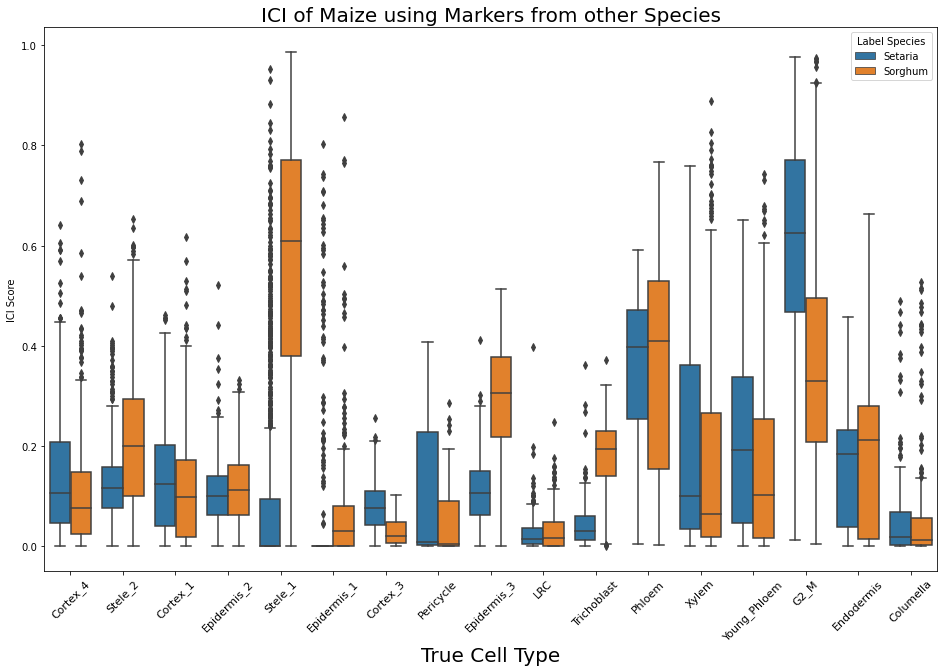

In [18]:
fig, ax = plt.subplots(figsize = (16,10))
fig.patch.set_facecolor('white')
ax = sns.boxplot(data = all_cell_correct_results, x = 'True Cell Type',y = 'ICI Score',hue = 'Label Species')
#plt.ylabel("Fraction of Original Cell Type Correctly Labeled", fontsize = 20)
plt.xlabel("True Cell Type", fontsize = 20)
#sns.despine()

ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
# plt.xlim((0,1000))
#plt.ylim((0, 1))
plt.title("ICI of Maize using Markers from other Species", fontsize = 20)
plt.xticks(fontsize = 11, rotation = 45 )
#plt.yticks(fontsize = 11)


In [19]:
all_cell_correct_results = pd.DataFrame(columns = ['ICI Score','Label Species','True Cell Type'])
for cell_type in list_of_cell_types:
    labeled_cells = sorghum_data_only.loc[sorghum_data_only['Cell Cluster Annotation'] == cell_type]


    current_cell_label = 'Setaria_'+cell_type
    labeled_cells_scores_1 = labeled_cells[[current_cell_label]]
    labeled_cells_scores_1['Label Species'] = 'Setaria'
    labeled_cells_scores_1['True Cell Type'] = cell_type
    labeled_cells_scores_1 = labeled_cells_scores_1.rename(columns = {current_cell_label:'ICI Score'})

    current_cell_label = 'Maize_'+cell_type
    labeled_cells_scores_2 = labeled_cells[[current_cell_label]]
    labeled_cells_scores_2['Label Species'] = 'Maize'
    labeled_cells_scores_2['True Cell Type'] = cell_type

    labeled_cells_scores_2 = labeled_cells_scores_2.rename(columns = {current_cell_label:'ICI Score'})
    
    all_cell_correct_results = pd.concat([all_cell_correct_results,labeled_cells_scores_1,labeled_cells_scores_2])

all_cell_correct_results

/tmp/ipykernel_3646709/2666254752.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labeled_cells_scores_1['Label Species'] = 'Setaria'
/tmp/ipykernel_3646709/2666254752.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labeled_cells_scores_1['True Cell Type'] = cell_type
/tmp/ipykernel_3646709/2666254752.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

,ICI Score,Label Species,True Cell Type
Sorghum_Cell_ACCACAATCGAGAATA,0.002087,Setaria,Cortex_4
Sorghum_Cell_CACGTGGTCGACACTA,0.164347,Setaria,Cortex_4
Sorghum_Cell_GACTTCCTCGCTGACG,0.062832,Setaria,Cortex_4
Sorghum_Cell_CCGGTGAGTGCGTTTA,0.057979,Setaria,Cortex_4
Sorghum_Cell_TAGCACATCAAGAAAC,0.049364,Setaria,Cortex_4
...,...,...,...
Sorghum_Nucl1_TGGCGTGCACGTTCGG,0.019189,Maize,Columella
Sorghum_Nucl1_TTTCCTCTCCACGTCT,0.003333,Maize,Columella
Sorghum_Nucl2_GCCAGCACACTTGTCC,0.002683,Maize,Columella
Sorghum_Nucl2_GACAGCCGTGTGTTTG,0.02108,Maize,Columella


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Cortex_4'),
  Text(1, 0, 'Stele_2'),
  Text(2, 0, 'Cortex_1'),
  Text(3, 0, 'Epidermis_2'),
  Text(4, 0, 'Stele_1'),
  Text(5, 0, 'Epidermis_1'),
  Text(6, 0, 'Cortex_3'),
  Text(7, 0, 'Pericycle'),
  Text(8, 0, 'Epidermis_3'),
  Text(9, 0, 'LRC'),
  Text(10, 0, 'Trichoblast'),
  Text(11, 0, 'Phloem'),
  Text(12, 0, 'Xylem'),
  Text(13, 0, 'Young_Phloem'),
  Text(14, 0, 'G2_M'),
  Text(15, 0, 'Endodermis'),
  Text(16, 0, 'Columella')])

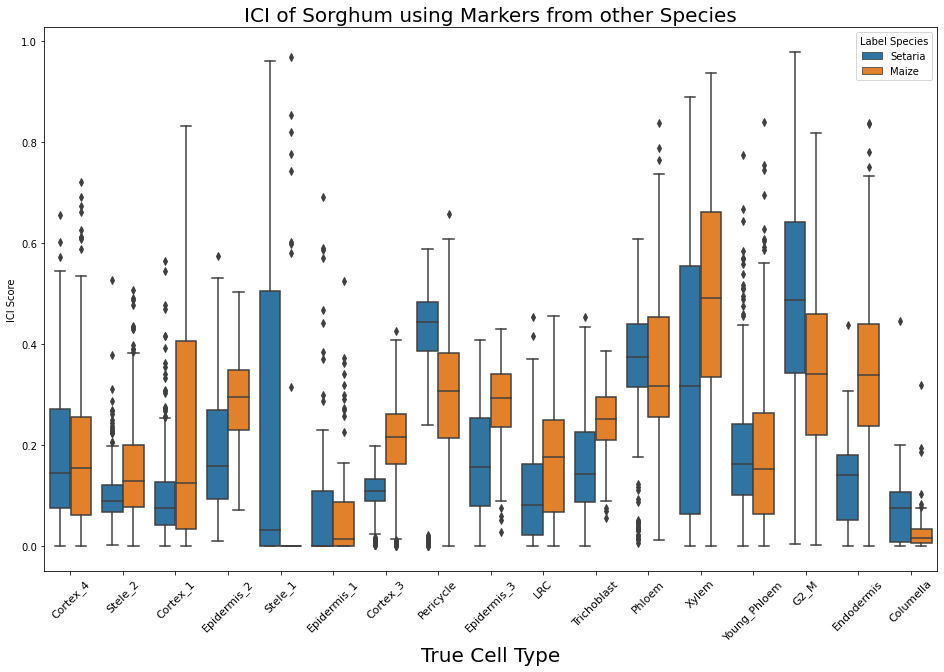

In [20]:
fig, ax = plt.subplots(figsize = (16,10))
fig.patch.set_facecolor('white')
ax = sns.boxplot(data = all_cell_correct_results, x = 'True Cell Type',y = 'ICI Score',hue = 'Label Species')
#plt.ylabel("Fraction of Original Cell Type Correctly Labeled", fontsize = 20)
plt.xlabel("True Cell Type", fontsize = 20)
#sns.despine()

ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
# plt.xlim((0,1000))
#plt.ylim((0, 1))
plt.title("ICI of Sorghum using Markers from other Species", fontsize = 20)
plt.xticks(fontsize = 11, rotation = 45 )
#plt.yticks(fontsize = 11)

In [21]:
all_cell_correct_results = pd.DataFrame(columns = ['ICI Score','Label Species','True Cell Type'])
for cell_type in list_of_cell_types:
    labeled_cells = setaria_data_only.loc[setaria_data_only['Cell Cluster Annotation'] == cell_type]


    current_cell_label = 'Sorghum_'+cell_type
    labeled_cells_scores_1 = labeled_cells[[current_cell_label]]
    labeled_cells_scores_1['Label Species'] = 'Sorghum'
    labeled_cells_scores_1['True Cell Type'] = cell_type
    labeled_cells_scores_1 = labeled_cells_scores_1.rename(columns = {current_cell_label:'ICI Score'})

    current_cell_label = 'Maize_'+cell_type
    labeled_cells_scores_2 = labeled_cells[[current_cell_label]]
    labeled_cells_scores_2['Label Species'] = 'Maize'
    labeled_cells_scores_2['True Cell Type'] = cell_type

    labeled_cells_scores_2 = labeled_cells_scores_2.rename(columns = {current_cell_label:'ICI Score'})
    
    all_cell_correct_results = pd.concat([all_cell_correct_results,labeled_cells_scores_1,labeled_cells_scores_2])

all_cell_correct_results

/tmp/ipykernel_3646709/4172574685.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labeled_cells_scores_1['Label Species'] = 'Sorghum'
/tmp/ipykernel_3646709/4172574685.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labeled_cells_scores_1['True Cell Type'] = cell_type
/tmp/ipykernel_3646709/4172574685.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

,ICI Score,Label Species,True Cell Type
Set_Cell_TGACGGCTCTGCTGTC-1,0.115133,Sorghum,Cortex_4
Set_Nuclei_1_AGAAATGGTTTACGAC-1,0.052131,Sorghum,Cortex_4
Set_Nuclei_1_CTATCCGGTCTCAGGC-1,0.094225,Sorghum,Cortex_4
Set_Nuclei_1_CTCATTATCCTCAGGG-1,0.63286,Sorghum,Cortex_4
Set_Nuclei_1_CCACACTGTGTCCGTG-1,0.044668,Sorghum,Cortex_4
...,...,...,...
Set_Cells_3_TTGTGTTCATGAAGGC,0.03522,Maize,Columella
Set_Cells_3_TTGTTCAAGCGCGTTC,0.089694,Maize,Columella
Set_Cells_3_TTTCACACATCAGCGC,0.098788,Maize,Columella
Set_Cells_3_TTTCCTCCAAGAAATC,0.084081,Maize,Columella


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Cortex_4'),
  Text(1, 0, 'Stele_2'),
  Text(2, 0, 'Cortex_1'),
  Text(3, 0, 'Epidermis_2'),
  Text(4, 0, 'Stele_1'),
  Text(5, 0, 'Epidermis_1'),
  Text(6, 0, 'Cortex_3'),
  Text(7, 0, 'Pericycle'),
  Text(8, 0, 'Epidermis_3'),
  Text(9, 0, 'LRC'),
  Text(10, 0, 'Trichoblast'),
  Text(11, 0, 'Phloem'),
  Text(12, 0, 'Xylem'),
  Text(13, 0, 'Young_Phloem'),
  Text(14, 0, 'G2_M'),
  Text(15, 0, 'Endodermis'),
  Text(16, 0, 'Columella')])

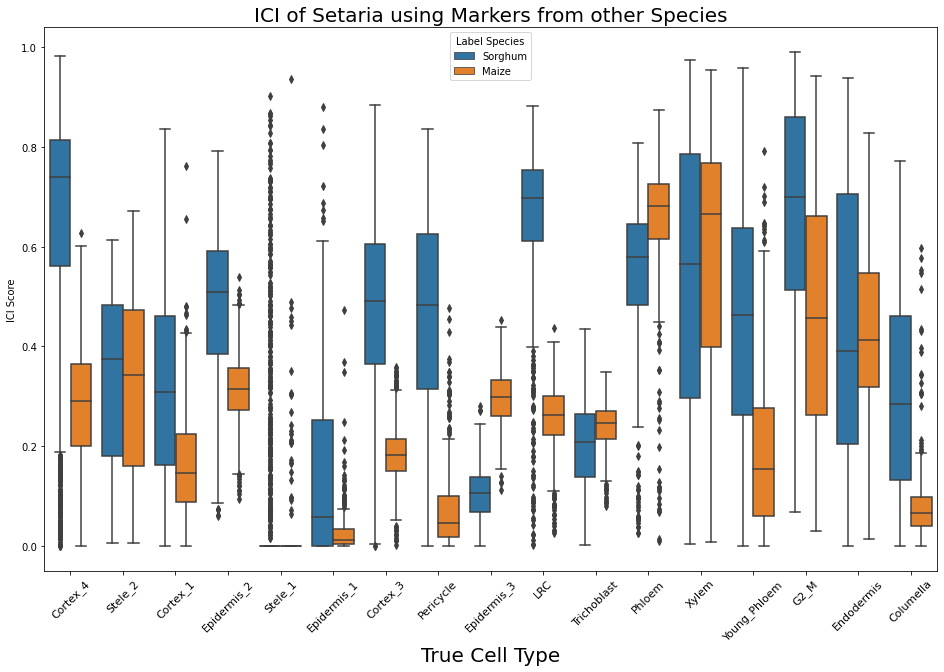

In [22]:
fig, ax = plt.subplots(figsize = (16,10))
fig.patch.set_facecolor('white')
ax = sns.boxplot(data = all_cell_correct_results, x = 'True Cell Type',y = 'ICI Score',hue = 'Label Species')
#plt.ylabel("Fraction of Original Cell Type Correctly Labeled", fontsize = 20)
plt.xlabel("True Cell Type", fontsize = 20)
#sns.despine()

ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
# plt.xlim((0,1000))
#plt.ylim((0, 1))
plt.title("ICI of Setaria using Markers from other Species", fontsize = 20)
plt.xticks(fontsize = 11, rotation = 45 )
#plt.yticks(fontsize = 11)

In [15]:
merged_obs_and_full_results

,Batch,nCount_RNA,nFeature_RNA,nCount_SCT,nFeature_SCT,integrated_snn_res.0.6,seurat_clusters,Species,Cell Cluster Annotation,Type,...,Setaria_Epidermis_3,Setaria_G2_M,Setaria_LRC,Setaria_Pericycle,Setaria_Phloem,Setaria_Stele_1,Setaria_Stele_2,Setaria_Trichoblast,Setaria_Xylem,Setaria_Young_Phloem
Maize_Cell1_AAACCTGAGAGCTTCT,Maize_Cell_1,7907,3206,13445,3280,6,6,Maize,Cortex_4,Cell,...,0.034150,0.000000,0.003043,0.038318,0.040570,0.000000,0.015967,0.000000,0.029643,0.001685
Maize_Cell1_AAACCTGAGTGATCGG,Maize_Cell_1,11556,3579,14008,3580,7,7,Maize,Stele_2,Cell,...,0.000000,0.000912,0.007072,0.141137,0.078227,0.406931,0.020329,0.000000,0.010514,0.176388
Maize_Cell1_AAACCTGCACTGTCGG,Maize_Cell_1,19725,4690,15803,4688,1,1,Maize,Cortex_1,Cell,...,0.000000,0.003507,0.008138,0.153544,0.176176,0.000000,0.005810,0.000000,0.039492,0.060391
Maize_Cell1_AAACCTGGTGTGAAAT,Maize_Cell_1,17272,4355,15469,4354,6,6,Maize,Cortex_4,Cell,...,0.010733,0.008847,0.044449,0.081509,0.044436,0.000000,0.018393,0.046384,0.054622,0.039846
Maize_Cell1_AAACCTGTCTCAAGTG,Maize_Cell_1,11246,3548,13956,3546,14,14,Maize,Epidermis_2,Cell,...,0.156031,0.000000,0.007020,0.004603,0.001799,0.000000,0.000275,0.019223,0.000030,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Set_Cells_3_TTTGGTTTCTGGGTCG,Set_Cells_3,9192,2954,21040,3212,14,14,Setaria,Epidermis_2,Cell,...,0.293845,0.002942,0.002843,0.000061,0.001742,0.000000,0.000000,0.075833,0.000279,0.000659
Set_Cells_3_TTTGTTGAGGCTCACC,Set_Cells_3,27048,4655,23549,4654,16,16,Setaria,Trichoblast,Cell,...,0.181436,0.000118,0.140445,0.001837,0.000122,0.000000,0.000035,0.519364,0.000000,0.000000
Set_Cells_3_TTTGTTGCAACCAGAG,Set_Cells_3,21855,5009,22238,5009,17,17,Setaria,Phloem,Cell,...,0.000392,0.000240,0.000000,0.006404,0.543996,0.000000,0.118094,0.000000,0.012559,0.307223
Set_Cells_3_TTTGTTGCAGTCTACA,Set_Cells_3,9015,2669,20346,3006,3,3,Setaria,LRC,Cell,...,0.009266,0.000000,0.720130,0.001435,0.000760,0.000000,0.000278,0.145338,0.002348,0.000000
